In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\manee\OneDrive\Documents\daily-minimum-temperatures-in-me.csv")

In [3]:
df.head()

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
0,01-01-1981,20.7
1,02-01-1981,17.9
2,03-01-1981,18.8
3,04-01-1981,14.6
4,05-01-1981,15.8


In [4]:
df.shape

(3650, 2)

In [5]:
df.isnull().sum()

Date                                                             0
Daily minimum temperatures in Melbourne, Australia, 1981-1990    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Date                                                           3650 non-null   object
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

In [8]:
df[df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'] == '?0.2']

,Date,"Daily minimum temperatures in Melbourne, Australia, 1981-1990"
565,1982-07-20,?0.2


In [9]:
df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].str.replace(r'[^0-9\.\-]', ' ', regex = True)

In [10]:
df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = df['Daily minimum temperatures in Melbourne, Australia, 1981-1990'].astype('float')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           3650 non-null   datetime64[ns]
 1   Daily minimum temperatures in Melbourne, Australia, 1981-1990  3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [13]:
df.rename(columns = {'Date': 'ds', 'Daily minimum temperatures in Melbourne, Australia, 1981-1990' : 'y' }, inplace = True)

In [14]:
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [18]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 3.6 MB/s eta 0:00:04
    --------------------------------------- 0.3/13.3 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.6/13.3 MB 4.8 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/13.3 MB 3.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.1/13.3 MB 4.9 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/13.3 MB 4.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.7/13.3 MB 5.2 MB/s eta 0:00:03
   ------ --------------------------------- 2.0/13.3 MB 5.4 MB/s eta 0:00:03
   ------- -------------------------------- 2.5/13.3 MB 5.8 MB/s eta 0:00:02
   -------- ------------------------------- 2.8/13.3 MB 6.0 MB/s eta 0:00:02
   --------- ------------------------------ 3.0/13.3 MB 6.0 MB/s eta 0:00:02
   --------- ------------------------------ 3.2/13.3 MB 5.6 MB/s eta 0:00:02
   ---

In [19]:
from prophet import Prophet

In [21]:
model = Prophet()

In [22]:
model.fit(df)

11:25:07 - cmdstanpy - INFO - Chain [1] start processing
11:25:09 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future = model.make_future_dataframe(periods = 10, freq = 'D')

In [25]:
forecast = model.predict(future)

In [26]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.858854,11.778229,18.509123,11.858854,11.858854,3.328315,3.328315,3.328315,0.010955,0.010955,0.010955,3.317361,3.317361,3.317361,0.0,0.0,0.0,15.187170
1,1981-01-02,11.857015,12.032435,18.762141,11.857015,11.857015,3.375099,3.375099,3.375099,-0.019840,-0.019840,-0.019840,3.394939,3.394939,3.394939,0.0,0.0,0.0,15.232114
2,1981-01-03,11.855177,12.014515,18.756003,11.855177,11.855177,3.411920,3.411920,3.411920,-0.060119,-0.060119,-0.060119,3.472039,3.472039,3.472039,0.0,0.0,0.0,15.267097
3,1981-01-04,11.853338,11.851206,18.660089,11.853338,11.853338,3.394334,3.394334,3.394334,-0.153082,-0.153082,-0.153082,3.547416,3.547416,3.547416,0.0,0.0,0.0,15.247671
4,1981-01-05,11.851499,12.152098,18.851403,11.851499,11.851499,3.600142,3.600142,3.600142,-0.019706,-0.019706,-0.019706,3.619848,3.619848,3.619848,0.0,0.0,0.0,15.451641


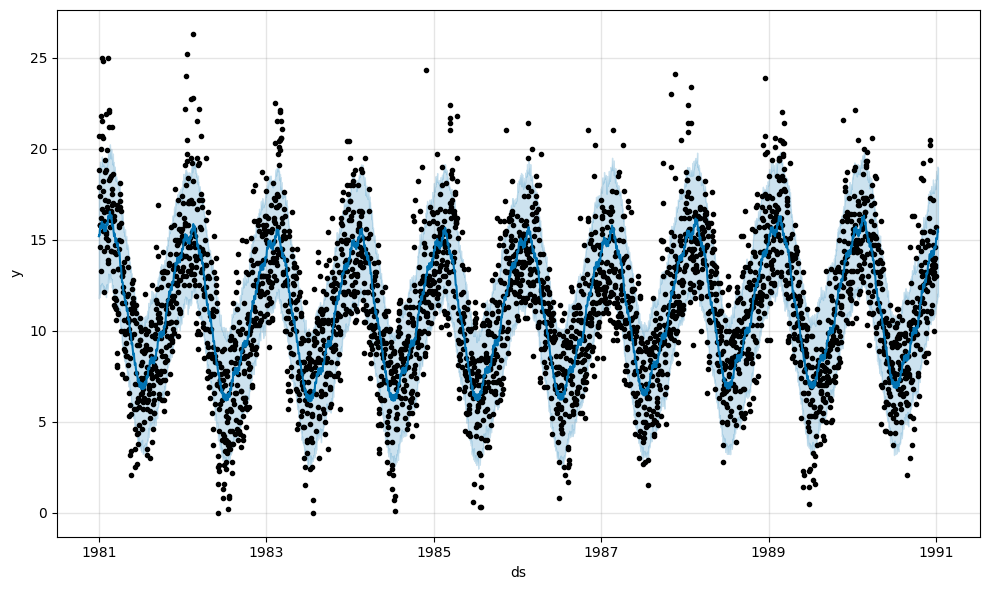

In [27]:
fig = model.plot(forecast)

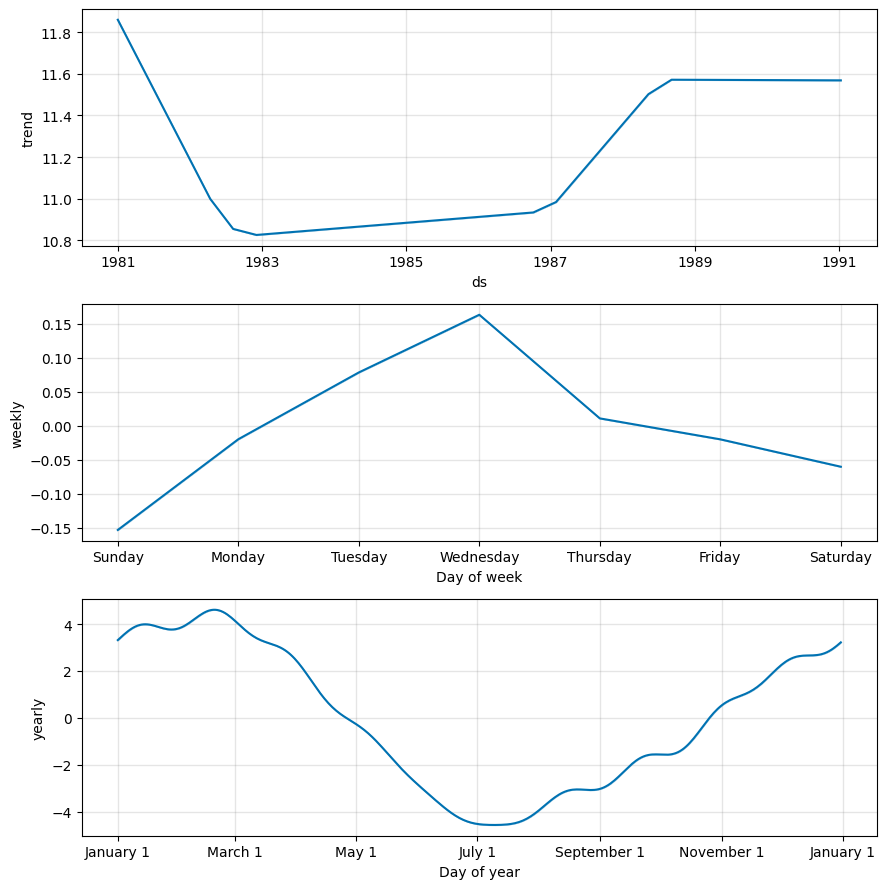

In [28]:
components = model.plot_components(forecast)